# Install Dependencies

In [ ]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\user\AppData\Local\Temp\pip-install-hz1415lc\tensorflow-gpu_2475970919bc4293a1a873460a96e785\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build

In [ ]:
%pip list

Package                      Version
---------------------------- ---------------
absl-py                      2.1.0
anyio                        4.2.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
certifi                      2023.11.17
cffi                         1.16.0
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
defusedxml                   0.7.1
executing                    2.0.1
fastjsonschema               2.19.1
flatbuffers                  24.3.25
fonttools                   

# Conversion of Celeb-DF into Image Dataset

In [1]:
import tensorflow as tf
import os
import cv2
import shutil

In [ ]:
data_dir = r'C:\Users\user\Desktop\new_data'

In [ ]:
os.listdir(data_dir)

['Celeb-real', 'Celeb-synthesis']

In [ ]:
def video_to_images(video_path, image_dir):
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)

    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    #frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
    #interval = max(total_frames // target_frames, 1)
    #frame_count = 0
    middle_frame_index = total_frames // 2
    current_frame = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if current_frame == middle_frame_index:
            #frame_path = os.path.join(image_dir, f"frame_{frame_count:04d}.jpg")
            frame_path = os.path.join(image_dir, "middle_frame.jpg")
            success = cv2.imwrite(frame_path, frame)
            #if success:
                #print(f"Frame {frame_count} saved successfully as {frame_path}")
                #print(f"Middle frame saved successfully as {frame_path}")
            #else:
                #print(f"Failed to save frame {frame_count}")
                #print(f"Failed to save the middle frame")
            cv2.imshow('Middle Frame', frame)
            #frame_count += 1

        current_frame += 1
        #if frame_count >= target_frames:
        #    break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
def video_dataset_to_images(dataset_dir, image_dir):
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(".mp4"):
                video_path = os.path.join(root, file)
                video_name = os.path.splitext(file)[0]
                video_output_dir = os.path.join(image_dir, video_name)
                video_to_images(video_path, video_output_dir)

dataset_dir = r'C:\Users\user\Desktop\new_data\Celeb-synthesis'
image_dir = r'C:\Users\user\Desktop\new_data\fake_images'
#target_frames = 11
#video_dataset_to_images(dataset_dir, image_dir)

In [ ]:
def merge_image_folders(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    file_counter = 0
    for folder_name in os.listdir(input_dir):
        folder_path = os.path.join(input_dir, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                if os.path.isfile(file_path) and (file_name.endswith('.jpg') or file_name.endswith('.png')):
                    new_file_name = f"image_{file_counter:06d}.jpg"
                    new_file_path = os.path.join(output_dir, new_file_name)
                    shutil.copy(file_path, new_file_path)
                    print(f"File {file_name} copied to {new_file_path}")
                    file_counter += 1


input_dir = r'C:\Users\user\Desktop\new_data\fake_images'
output_dir = r'C:\Users\user\Desktop\new_data\fake_images'
#merge_image_folders(input_dir, output_dir)

File middle_frame.jpg copied to C:\Users\user\Desktop\new_data\fake_images\image_000000.jpg
File middle_frame.jpg copied to C:\Users\user\Desktop\new_data\fake_images\image_000001.jpg
File middle_frame.jpg copied to C:\Users\user\Desktop\new_data\fake_images\image_000002.jpg
File middle_frame.jpg copied to C:\Users\user\Desktop\new_data\fake_images\image_000003.jpg
File middle_frame.jpg copied to C:\Users\user\Desktop\new_data\fake_images\image_000004.jpg
File middle_frame.jpg copied to C:\Users\user\Desktop\new_data\fake_images\image_000005.jpg
File middle_frame.jpg copied to C:\Users\user\Desktop\new_data\fake_images\image_000006.jpg
File middle_frame.jpg copied to C:\Users\user\Desktop\new_data\fake_images\image_000007.jpg
File middle_frame.jpg copied to C:\Users\user\Desktop\new_data\fake_images\image_000008.jpg
File middle_frame.jpg copied to C:\Users\user\Desktop\new_data\fake_images\image_000009.jpg
File middle_frame.jpg copied to C:\Users\user\Desktop\new_data\fake_images\image

# Drive Mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset using Keras

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
!mkdir p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d hassansalamat/deepfakedataset

Dataset URL: https://www.kaggle.com/datasets/hassansalamat/deepfakedataset
License(s): unknown
 99% 945M/951M [00:08<00:00, 138MB/s]
100% 951M/951M [00:08<00:00, 115MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/deepfakedataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
data_dir = r'/content/drive/MyDrive/final_data'

data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/final_data')

Found 1590 files belonging to 2 classes.


In [ ]:
data_dir = r'/content/drive/MyDrive/new_data'

data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/new_data')

Found 1205 files belonging to 2 classes.


In [7]:
data = tf.keras.utils.image_dataset_from_directory('/content/data')

Found 16320 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator() #initalized batched size of 32 images, iterating one by one

In [9]:
batch = data_iterator.next()

In [10]:
batch[0].max() #batch[0] represented images as numpy array

255.0

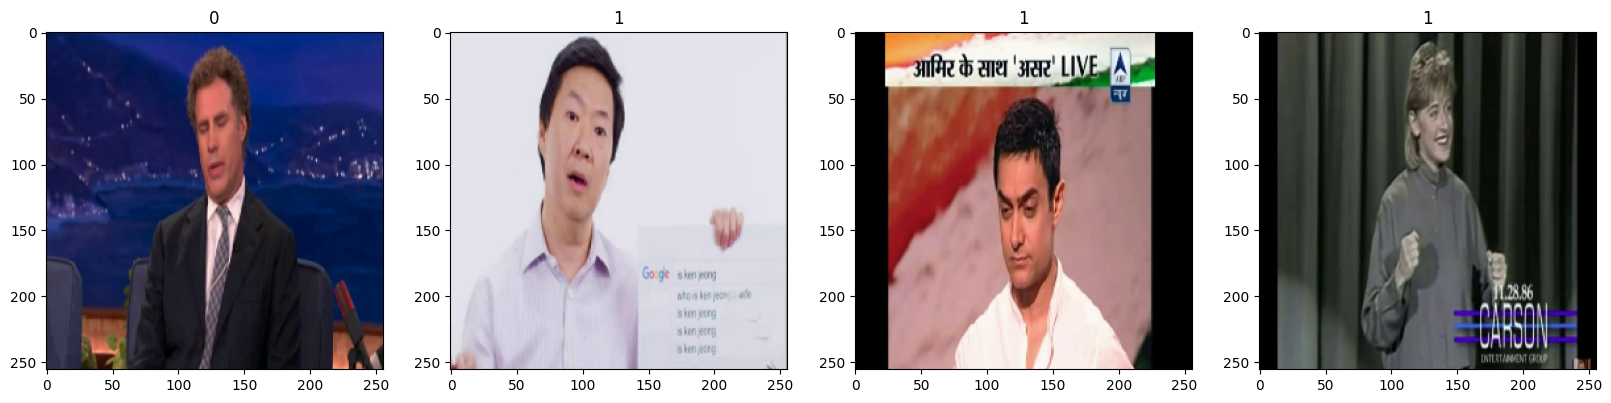

In [11]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
total_images_label_1 = 0
for images, labels in data.as_numpy_iterator():
    total_images_label_1 += sum(labels == 1)
print("Total number of images labeld as 1 are: ", total_images_label_1)
# Total real images are 8160 & total no of DeepFake images are 8745
# Total new real images are 408 & total no of new DeepFake images are 795
# Final Dataset have equal no of images: 795

Total number of images labeld as 1 are:  8160


# Preprocessing

In [12]:
scaled_data = data.map(lambda x, y: (x/255, y))
scaled_iterator = scaled_data.as_numpy_iterator()
batch = scaled_iterator.next()

In [13]:
batch[0].max()

1.0

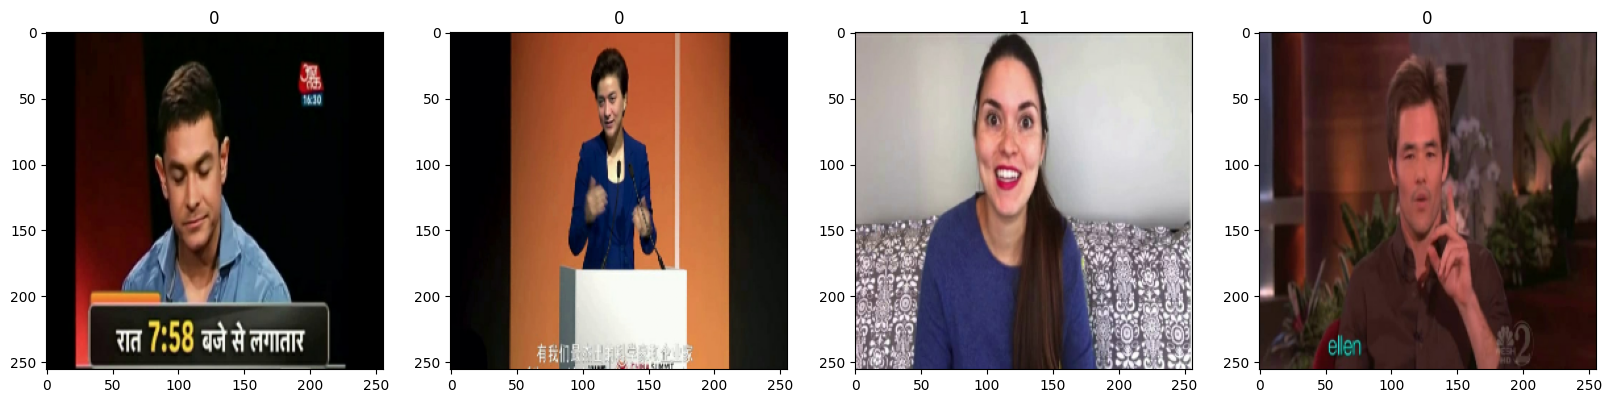

In [14]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

357

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [18]:
len(test)

51

# Deep Learning Models

**Model-1**

In [19]:
from tensorflow import keras
from keras.applications import VGG16
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, LeakyReLU

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation ='sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

**Model-1 Training**

In [20]:
logdir = 'logs'

In [21]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [22]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
history = model.fit(train, epochs = 10, validation_data = val, callbacks = [tensorboard_callback, callback])

Epoch 1/10


370/370 ━━━━━━━━━━━━━━━━━━━━ 1783s 5s/step - accuracy: 0.5949 - loss: 6.3984 - val_accuracy: 0.6125 - val_loss: 0.7316
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 1515s 4s/step - accuracy: 0.6275 - loss: 1.0323 - val_accuracy: 0.7060 - val_loss: 0.5612
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 1518s 4s/step - accuracy: 0.6668 - loss: 0.6225 - val_accuracy: 0.6940 - val_loss: 0.5676
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 1688s 5s/step - accuracy: 0.6821 - loss: 0.5950 - val_accuracy: 0.7188 - val_loss: 0.5487
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 1719s 5s/step - accuracy: 0.6868 - loss: 0.5817 - val_accuracy: 0.7110 - val_loss: 0.9904
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 1563s 4s/step - accuracy: 0.7077 - loss: 0.5756 - val_accuracy: 0.7488 - val_loss: 0.5050
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 36705s 99s/step - accuracy: 0.7232 - loss: 0.5397 - val_accuracy: 0.7518 - val_loss: 0.5169
Epoch 8/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 2208s 6s/step - accuracy: 0.7220 - loss: 0.5778 - val_accur

**Model-1 Performances**

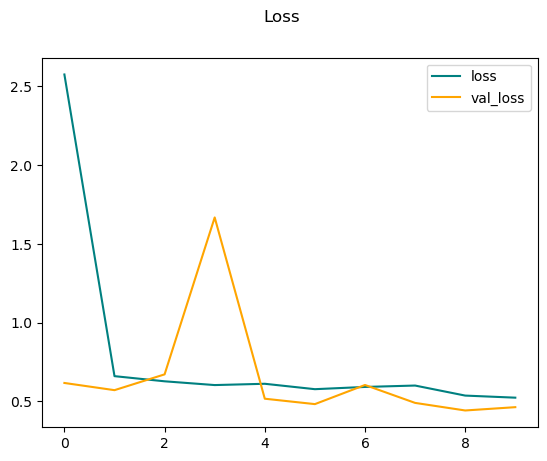

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss')
plt.legend(loc = "upper right")
plt.show()

**Loss after 10 more Epochs-2nd Time**

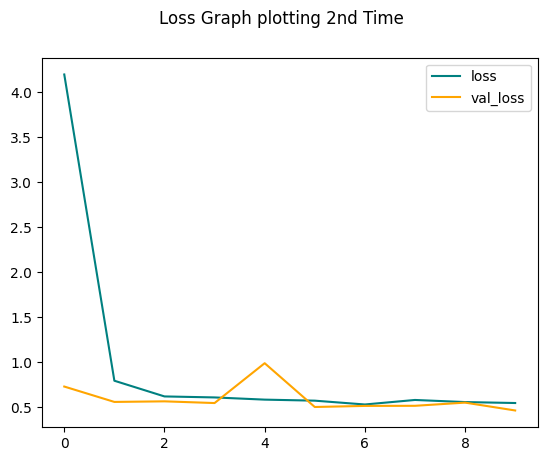

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss Graph plotting 2nd Time')
plt.legend(loc = "upper right")
plt.show()

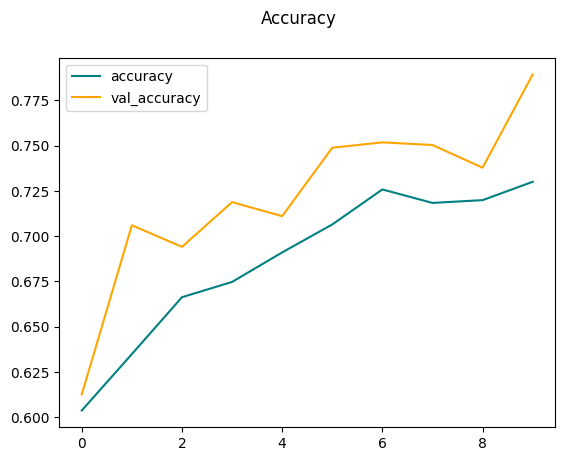

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
plt.suptitle('Accuracy')
plt.legend(loc = 'upper left')
plt.show()

**Model-1 Evaluate Performance**

In [23]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [24]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

**Model-1 Metrics Calculation-2nd Time**

In [ ]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/

**Model-1 Testing with Predictions**

In [ ]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))
    image = image.astype(np.float32) / 255.0
    image = np.expand_dims(image, axis=0)
    return image

In [ ]:
def predict_image(image_path, model):
    image = preprocess_image(image_path)
    prediction = model.predict(image)
    label = "Fake" if prediction < 0.5 else "Real"
    return label

In [ ]:
trained_model = model

In [ ]:
def predict_images(image_paths, model):
    predictions = []
    for image_path in image_paths:
        prediction_label = predict_image(image_path, model)
        predictions.append((image_path, prediction_label))
    return predictions

In [ ]:
upload_image_paths = [r'C:\Users\user\Desktop\test_image1.jpg', r'C:\Users\user\Desktop\test_image2.jpg', r'C:\Users\user\Desktop\test_image3.jpg', r'C:\Users\user\Desktop\test_image4.jpg', r'C:\Users\user\Desktop\test_image5.jpg', r'C:\Users\user\Desktop\test_image6.jpg']

In [ ]:
predictions = predict_images(upload_image_paths, trained_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


**VGG16 Architecture**

In [25]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in vgg16_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg16_base)
model.add(Flatten())

model.add(Dense(128, LeakyReLU(alpha=0.3)))
model.add(Dropout(0.5))
model.add(Dense(64, LeakyReLU(alpha=0.3)))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4194432   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                         

In [ ]:
history = model.fit(train, epochs = 10, validation_data = val, callbacks = [tensorboard_callback, callback])

Epoch 1/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 9299s 25s/step - accuracy: 0.6714 - loss: 11.0238 - val_accuracy: 0.7479 - val_loss: 3.7391
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10441s 28s/step - accuracy: 0.7272 - loss: 6.7048 - val_accuracy: 0.8241 - val_loss: 1.5026
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 8987s 24s/step - accuracy: 0.7516 - loss: 3.0626 - val_accuracy: 0.8426 - val_loss: 0.7993
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 8281s 22s/step - accuracy: 0.7762 - loss: 1.2501 - val_accuracy: 0.8435 - val_loss: 0.3935
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 7846s 21s/step - accuracy: 0.8032 - loss: 0.5463 - val_accuracy: 0.8393 - val_loss: 0.3707
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 7847s 21s/step - accuracy: 0.8305 - loss: 0.3999 - val_accuracy: 0.8411 - val_loss: 0.3846
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 7812s 21s/step - accuracy: 0.8349 - loss: 0.3847 - val_accuracy: 0.8476 - val_loss: 0.3960
Epoch 8/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 23255s 63s/step - accuracy: 0.8351 - loss

In [26]:
history = model.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback, callback])

Epoch 1/100
357/357 [==============================] - 114s 283ms/step - loss: 8.6036 - accuracy: 0.7039 - val_loss: 3.7981 - val_accuracy: 0.7855
Epoch 2/100
357/357 [==============================] - 143s 399ms/step - loss: 4.9941 - accuracy: 0.7409 - val_loss: 2.0272 - val_accuracy: 0.7920
Epoch 3/100
357/357 [==============================] - 102s 284ms/step - loss: 2.3663 - accuracy: 0.7606 - val_loss: 0.7311 - val_accuracy: 0.8183
Epoch 4/100
357/357 [==============================] - 101s 280ms/step - loss: 0.9994 - accuracy: 0.7807 - val_loss: 0.4099 - val_accuracy: 0.8205
Epoch 5/100
357/357 [==============================] - 100s 278ms/step - loss: 0.4619 - accuracy: 0.8088 - val_loss: 0.3700 - val_accuracy: 0.8336
Epoch 6/100
357/357 [==============================] - 102s 283ms/step - loss: 0.3955 - accuracy: 0.8299 - val_loss: 0.3617 - val_accuracy: 0.8382
Epoch 7/100
357/357 [==============================] - 101s 280ms/step - loss: 0.3701 - accuracy: 0.8394 - val_loss: 0

**VGG16 Performace**

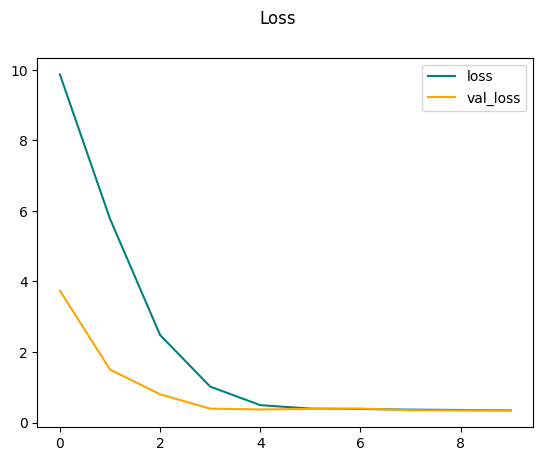

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss')
plt.legend(loc = "upper right")
plt.show()

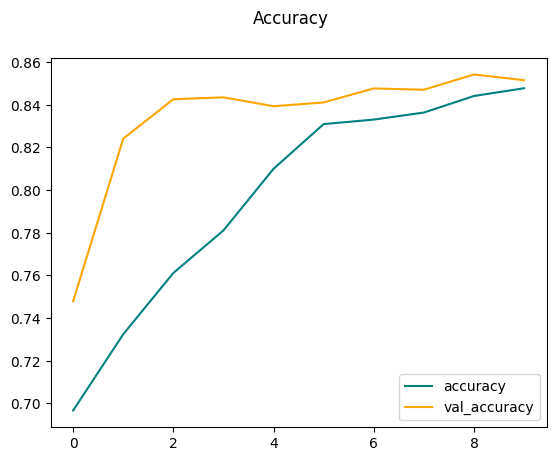

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy')
plt.legend(loc = "lower right")
plt.show()

**VGG16 Evaluate Performance**

In [ ]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━

**VGG16 Testing with Prediction**

In [ ]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))
    image = image.astype(np.float32) / 255.0
    image = np.expand_dims(image, axis=0)
    return image

In [ ]:
def predict_image(image_path, model):
    image = preprocess_image(image_path)
    prediction = model.predict(image)
    label = "Fake" if prediction < 0.5 else "Real"
    return label

In [ ]:
image_path = r'C:\Users\user\Desktop\test_image6.jpg'

In [ ]:
prediction = predict_image(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
prediction

array([[0.42684385]], dtype=float32)

**VGG16 Performance on Old Data**

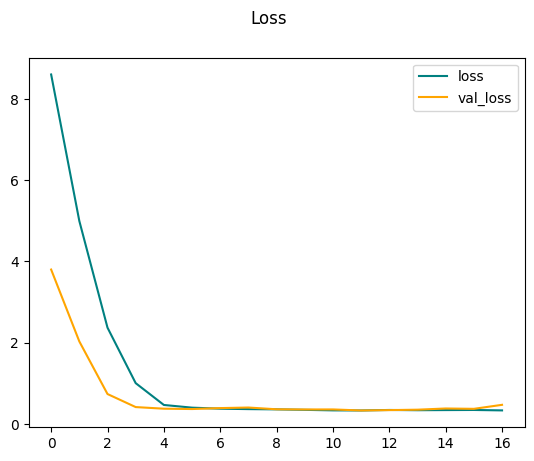

In [27]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss')
plt.legend(loc = "upper right")
plt.show()

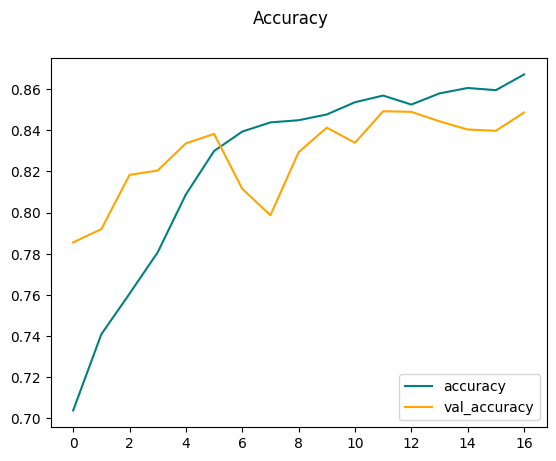

In [28]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy')
plt.legend(loc = "lower right")
plt.show()

**VGG16 Evaluation on Old Data**

In [29]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 [==============================] - 0s 29ms/step
Precision:0.9518458843231201, Recall:0.7179176807403564, Accuracy:0.8388480544090271


**VGG16 with Old Data Prediction**

In [30]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))
    image = image.astype(np.float32) / 255.0
    image = np.expand_dims(image, axis=0)
    return image

In [31]:
def predict_image(image_path, model):
    image = preprocess_image(image_path)
    prediction = model.predict(image)
    label = "Fake" if prediction < 0.5 else "Real"
    return label

In [40]:
image_path = r'/content/data/fake_images/image_000066.jpg'
prediction = predict_image(image_path, model)
prediction

1/1 [==============================] - 0s 30ms/step


'Fake'

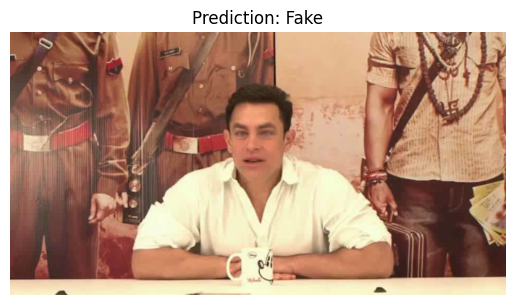

In [41]:
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {prediction}")
plt.axis('off')
plt.show()

In [42]:
from tensorflow.keras.models import load_model
model.save(os.path.join(r'/content', 'DFDM-FM.keras'))

**VGG16 Architecture with New DataSet**

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
	class_weight='balanced',
	classes=np.unique(batch[1]),
	y=batch[1]
)
class_weight_dict = {0:class_weights[0], 1:class_weights[1]}

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in vgg16_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg16_base)
model.add(Flatten())

model.add(Dense(128, LeakyReLU(alpha=0.3)))
model.add(Dropout(0.5))
model.add(Dense(64, LeakyReLU(alpha=0.3)))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               4194432   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
history = model.fit(train, epochs = 100, class_weight = class_weight_dict, validation_data = val, callbacks = [tensorboard_callback, callback])

Epoch 1/100
26/26 [==============================] - 26s 448ms/step - loss: 17.5300 - accuracy: 0.6130 - val_loss: 6.8827 - val_accuracy: 0.7723
Epoch 2/100
26/26 [==============================] - 13s 420ms/step - loss: 10.4417 - accuracy: 0.7043 - val_loss: 5.3674 - val_accuracy: 0.8080
Epoch 3/100
26/26 [==============================] - 13s 477ms/step - loss: 11.4002 - accuracy: 0.7188 - val_loss: 5.2296 - val_accuracy: 0.7277
Epoch 4/100
26/26 [==============================] - 11s 401ms/step - loss: 11.0657 - accuracy: 0.7272 - val_loss: 7.1171 - val_accuracy: 0.8259
Epoch 5/100
26/26 [==============================] - 15s 541ms/step - loss: 10.8455 - accuracy: 0.7284 - val_loss: 6.6156 - val_accuracy: 0.8482
Epoch 6/100
26/26 [==============================] - 15s 563ms/step - loss: 12.3603 - accuracy: 0.7500 - val_loss: 6.8622 - val_accuracy: 0.8527
Epoch 7/100
26/26 [==============================] - 17s 639ms/step - loss: 10.7164 - accuracy: 0.7584 - val_loss: 4.8213 - val_ac

**VGG16 Performance with New DataSet**


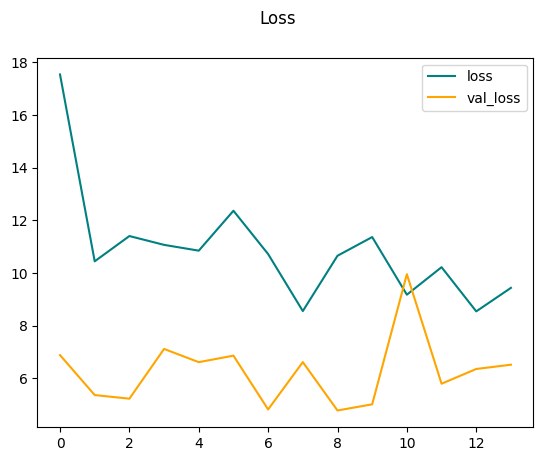

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss')
plt.legend(loc = "upper right")
plt.show()

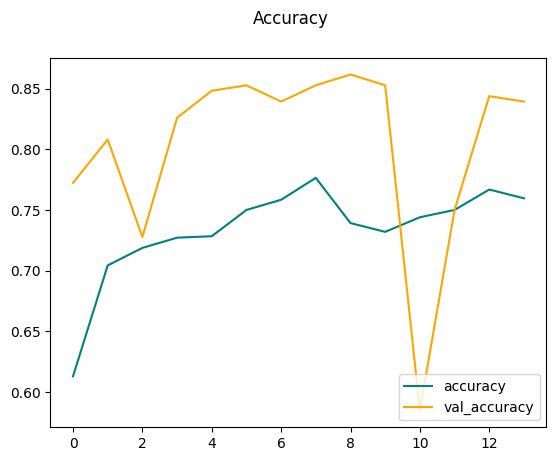

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy')
plt.legend(loc = "lower right")
plt.show()

**VGG16 Evaluation with New DataSet**

In [ ]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 [==============================] - 0s 54ms/step
Precision:0.761904776096344, Recall:0.47058823704719543, Accuracy:0.7604166865348816


**VGG16 Architecture with Final Final DataSet**

In [ ]:
#from sklearn.utils.class_weight import compute_class_weight

#class_weights = compute_class_weight(
	#class_weight='balanced',
	#classes=np.unique(batch[1]),
	#y=batch[1]
#)
#class_weight_dict = {0:class_weights[0], 1:class_weights[1]}

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in vgg16_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg16_base)
model.add(Flatten())

model.add(Dense(128, LeakyReLU(alpha=0.3)))
model.add(Dropout(0.5))
model.add(Dense(64, LeakyReLU(alpha=0.3)))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4194432   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                         

In [ ]:
history = model.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback, callback])

Epoch 1/100
35/35 [==============================] - 298s 8s/step - loss: 14.6069 - accuracy: 0.6420 - val_loss: 7.8343 - val_accuracy: 0.7688
Epoch 2/100
35/35 [==============================] - 14s 367ms/step - loss: 8.8816 - accuracy: 0.7464 - val_loss: 6.0375 - val_accuracy: 0.7500
Epoch 3/100
35/35 [==============================] - 14s 372ms/step - loss: 8.2416 - accuracy: 0.7848 - val_loss: 5.3538 - val_accuracy: 0.7344
Epoch 4/100
35/35 [==============================] - 17s 481ms/step - loss: 9.3355 - accuracy: 0.7321 - val_loss: 5.0602 - val_accuracy: 0.7906
Epoch 5/100
35/35 [==============================] - 18s 469ms/step - loss: 8.6134 - accuracy: 0.7804 - val_loss: 5.0647 - val_accuracy: 0.8156
Epoch 6/100
35/35 [==============================] - 14s 375ms/step - loss: 7.8436 - accuracy: 0.7714 - val_loss: 6.0205 - val_accuracy: 0.7781
Epoch 7/100
35/35 [==============================] - 14s 372ms/step - loss: 8.6192 - accuracy: 0.7670 - val_loss: 5.4508 - val_accuracy: 

**VGG16 Performance with Final DataSet**

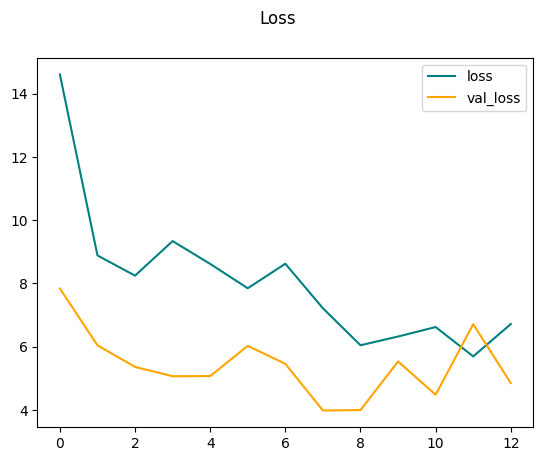

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss')
plt.legend(loc = "upper right")
plt.show()

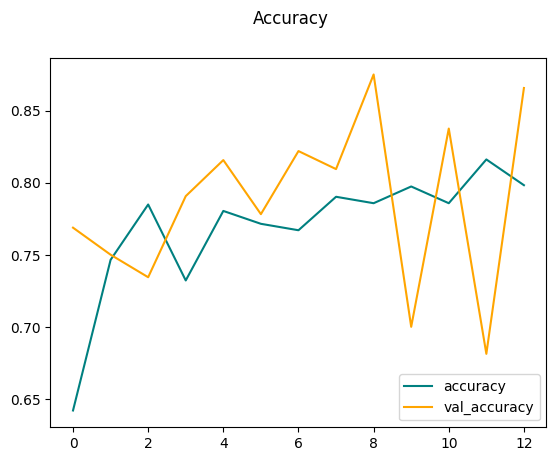

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy')
plt.legend(loc = "lower right")
plt.show()

**VGG16 Evaluation with Final DataSet**

In [ ]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 [==============================] - 6s 6s/step
Precision:0.84375, Recall:0.701298713684082, Accuracy:0.7799999713897705


# Final Prediction

In [ ]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))
    image = image.astype(np.float32) / 255.0
    image = np.expand_dims(image, axis=0)
    return image

In [ ]:
def predict_image(image_path, model):
    image = preprocess_image(image_path)
    prediction = model.predict(image)
    label = "Fake" if prediction < 0.5 else "Real"
    return label

In [ ]:
image_path = r'/content/drive/MyDrive/final_data/fake_images/image_000009.jpg'
prediction = predict_image(image_path, model)
prediction

1/1 [==============================] - 0s 30ms/step


'Real'

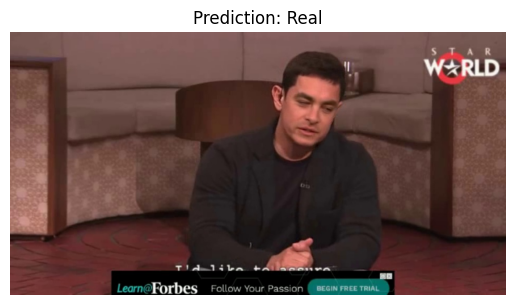

In [ ]:
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {prediction}")
plt.axis('off')
plt.show()

# Save Model

In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join(r'/content', 'DFDM-ND.keras'))